<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install yfinance dependence to get stock data from Yahoo Finance
!pip install yfinance

In [2]:
import yfinance as yf
import plotly.express as px
import seaborn as sns

In [3]:
semiconductor_companies = yf.Tickers(['NVDA', 'AMD', 'INTC', 'TXN'])
historical_data = semiconductor_companies.history(period='3mo', interval='1d')
historical_data

[*********************100%%**********************]  4 of 4 completed


Close                                    Dividends       \
                   AMD       INTC        NVDA         TXN       AMD INTC   
Date                                                                       
2023-09-12  105.309998  38.732639  448.660553  162.004974       0.0  0.0   
2023-09-13  107.709999  38.583130  454.810028  162.867081       0.0  0.0   
2023-09-14  106.629997  38.543259  455.769928  164.541733       0.0  0.0   
2023-09-15  101.489998  37.755852  438.961395  161.142868       0.0  0.0   
2023-09-18  102.370003  37.865494  439.621338  161.350967       0.0  0.0   
...                ...        ...         ...         ...       ...  ...   
2023-12-05  118.379997  41.919998  465.660004  157.250000       0.0  0.0   
2023-12-06  116.820000  41.270000  455.029999  156.050003       0.0  0.0   
2023-12-07  128.369995  42.150002  465.959991  157.679993       0.0  0.0   
2023-12-08  128.919998  42.700001  475.059998  157.029999       0.0  0.0   
2023-12-11  134.410004  44.540001  466.269989  159.970001       0.0  0.0   

                             High             ...        Open              \
            NVDA  TXN         AMD       INTC  ...        NVDA         TXN   
Date                                          ...                           
2023-09-12  0.00  0.0  106.739998  39.938673  ...  447.340662  163.174249   
2023-09-13  0.00  0.0  108.739998  39.021690  ...  445.960800  162.421171   
2023-09-14  0.00  0.0  109.150002  38.772508  ...  459.459606  164.908367   
2023-09-15  0.00  0.0  106.760002  38.393754  ...  453.370132  164.700270   
2023-09-18  0.00  0.0  102.989998  38.264181  ...  427.442416  160.528505   
...          ...  ...         ...        ...  ...         ...         ...   
2023-12-05  0.04  0.0  118.489998  42.290001  ...  454.660004  156.460007   
2023-12-06  0.00  0.0  122.830002  42.590000  ...  472.149994  159.130005   
2023-12-07  0.00  0.0  128.679993  42.439999  ...  457.000000  156.839996   
2023-12-08  0.00  0.0  131.000000  42.959999  ...  465.950012  157.289993   
2023-12-11  0.00  0.0  135.039993  44.730000  ...  474.910004  158.570007   

           Stock Splits                    Volume                               
                    AMD INTC NVDA  TXN        AMD      INTC      NVDA      TXN  
Date                                                                            
2023-09-12          0.0  0.0  0.0  0.0   44413600  55326600  34925600  3739900  
2023-09-13          0.0  0.0  0.0  0.0   44702300  35407800  39835500  3331900  
2023-09-14          0.0  0.0  0.0  0.0   45920600  30616500  37009700  4071600  
2023-09-15          0.0  0.0  0.0  0.0   71017600  68868800  50571300  9427000  
2023-09-18          0.0  0.0  0.0  0.0   49061300  29322200  50027100  3180100  
...                 ...  ...  ...  ...        ...       ...       ...      ...  
2023-12-05          0.0  0.0  0.0  0.0   39191600  31859300  37171800  4935600  
2023-12-06          0.0  0.0  0.0  0.0   60599000  31992300  38059000  4952200  
2023-12-07          0.0  0.0  0.0  0.0  118579100  29118700  35082300  6495400  
2023-12-08          0.0  0.0  0.0  0.0   89273900  42805900  35880300  4732100  
2023-12-11          0.0  0.0  0.0  0.0   98500600  48254300  50892500  7585100  

[64 rows x 28 columns]

In [4]:
px.line(data_frame=historical_data['Close'])

In [5]:
px.line(data_frame=historical_data['Close']['NVDA'])

In [6]:
px.area(data_frame=historical_data['Close']['NVDA'])

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
lm = LinearRegression()

In [9]:
nvidia_close = historical_data['Close']['NVDA'].to_frame().reset_index()
nvidia_close.rename({'NVDA': 'Close'}, axis=1, inplace=True)
lm.fit(np.array(nvidia_close.index).reshape(-1, 1), nvidia_close[['Close']])
print(lm.coef_, lm.intercept_)

[[0.82062671]] [425.45518398]


<Axes: ylabel='Close'>

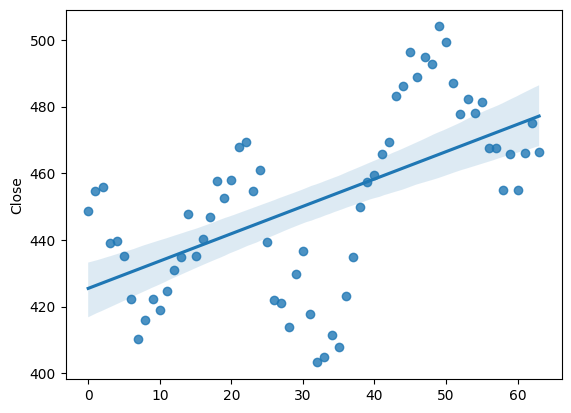

In [10]:
sns.regplot(x=nvidia_close.index, y=nvidia_close[['Close']])

In [11]:
returns = historical_data['Close'].pct_change()
returns.iloc[0, :] = 0
weights = np.array([0.25, 0.25, 0.25, 0.25])
cumulative_returns = (weights * returns + 1).cumprod()
px.line(cumulative_returns)